# 1D Heat Equation — Finite Difference Method

**PDE (1D heat equation).**

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2},\qquad 0<x<L,\; t>0
$$

Initial condition: \$u(x,0)=f(x)\$. Boundary (Dirichlet): \$u(0,t)=u(L,t)=0\$.

**Spatial / temporal grid.**

Let \$x\_i = i\Delta x\ (i=0,\dots,N)\$, \$t^n = n\Delta t\ (n=0,1,\dots)\$. Approximate \$u(x\_i,t^n)\approx u\_i^n\$.

**Finite differences.**

Time: forward difference

$$
\frac{\partial u}{\partial t}(x_i,t^n)\approx \frac{u_i^{n+1}-u_i^n}{\Delta t}.
$$

Space: central second derivative

$$
\frac{\partial^2 u}{\partial x^2}(x_i,t^n)\approx \frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{(\Delta x)^2}.
$$

**Substitute into PDE and rearrange.**

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t}=\alpha\frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{(\Delta x)^2}
$$

Define

$$
\lambda=\frac{\alpha\,\Delta t}{(\Delta x)^2}.
$$

Therefore the explicit update (Forward Euler in time, central in space) is

$$
\boxed{\;u_i^{n+1}=u_i^n + \lambda\big(u_{i+1}^n -2u_i^n + u_{i-1}^n\;).\;}
$$

Use this for interior points \$i=1,\dots,N-1\$ and enforce \$u\_0^n=u\_N^n=0\$. For stability of this explicit scheme require

$$
\lambda \le \tfrac{1}{2} \quad\Longrightarrow\quad \Delta t \le \frac{(\Delta x)^2}{2\alpha}.
$$

**We shall now use this format to solve the heat equation for the initial condition where $f(x) = \sin(\frac{\pi x }{L})$.**


Value of lambda is  = 0.01000


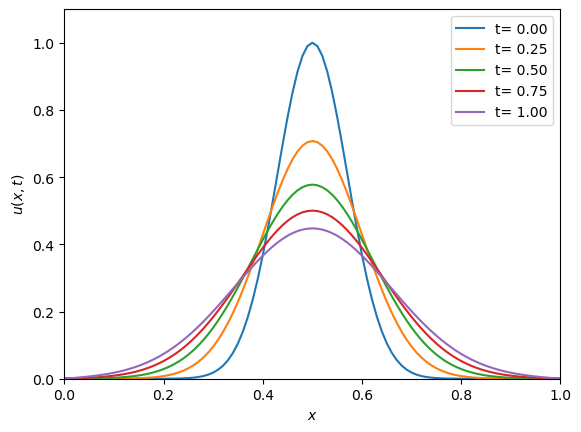

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions

#initial_condition = lambda x : np.sin(np.pi*x/L) # Sinusoidal initial value condition
#initial_condition = lambda x : piecewise_function(x) #Piecewise initial value condition
def initial_condition(x):
    sigma = 0.1
    return np.exp(-pow((x-L/2)/sigma,2))

def piecewise_function(x):
    return np.where((x>L/3.0) & (x< (2.0*L/3.0)), 1, 0)



a = 1
Nt = 10000 #Temporal grid size
Nx = 100 #Spacial grid size
L = 1 # Length of the rod
T = 1 #Time horizon
x = np.linspace(0,L,Nx+1)
t = np.linspace(0,T,Nt+1)
u_x0 = initial_condition(x)
hx = x[1] - x[0]
ht = t[1] -t[0]
lam = a * ht/(hx)
if (lam>0.5):
    print("Stability breaks. lambda is = {lam:.5f}".format(lam = lam))
else:
    print("Value of lambda is  = {lam:.5f}".format(lam = lam))
    ut = [list(u_x0)]
    
    for i in range(1,Nt+1):
        
        utnew = ut[i-1].copy()
        utlast = ut[i-1].copy()
        for j in range(Nx+1):
            if j>0 and j<Nx:
                utnew[j]=utlast[j]+lam*( utlast[j+1] -2* utlast[j] + utlast[j-1])
        
        ut.append(utnew)
    nn = Nt/4
    nn = int(nn)


    for ii in range(0,Nt+1,nn):
        plt.plot(x,ut[ii],label="t= {time:.2f}".format(time = ii*ht))
        #print("Hi")
    plt.legend()
    plt.xlim(0,L)
    plt.ylim(0,max(ut[0])*1.1)
    plt.xlabel("$x$")
    plt.ylabel("$u(x,t)$")
    plt.show()
